In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
import math
import scipy
import numpy as np
import scipy.stats as st
import pandas as pd

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests

# Узнаем номера моих задач

In [3]:
from zlib import crc32
import numpy as np

mail = input('\n')
to_hash =  mail.strip().split('@')[0]    
h = crc32(to_hash.encode('utf-8'))
seed = h%(2**32-1)
rs = np.random.RandomState(seed)
task1 = rs.randint(low=1, high=5)
task2 = rs.randint(low=1, high=5)
task3 = rs.randint(low=1, high=5)
task4 = rs.randint(low=1, high=4)
print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))


ugnivenko.va@phystech.edu
Your tasks are 1.1, 2.2, 3.2, 4.3


# Задача 3.2 

Дана статистика бросков для игроков NBA

Выборка представляет собой статистику бросков для различных игроков NBA. Для каждого игрока известны:

- количество успешных бросков в домашних играх (score_home)
- количество бросков в домашних играх (atm_home)
- количество успешных бросков в гостевых играх (score_away)
- количество бросков в гостевых играх (atm_away)


Требуется определить, есть ли разница в успехе бросков у игроков в домашних и гостевых играх.

У какого процента игроков разница в успехе существенна?

In [5]:
data = pd.read_csv("data/nba.csv", index_col=0)
data.head()

,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
7,A. Johnson,ATL,30,34,24,28,64,52
10,A. Johnson,TOR,63,57,44,38,120,82
15,Abdur-Rahim,SAC,114,124,84,90,238,174
22,Afflalo,DEN,236,284,189,227,520,416
23,Afflalo,DET,75,88,62,67,163,129


In [6]:
data['home_proportion'] = data['score_home'] /data['atm_home']

In [9]:
data['away_proportion'] = data['score_away'] /data['atm_away']

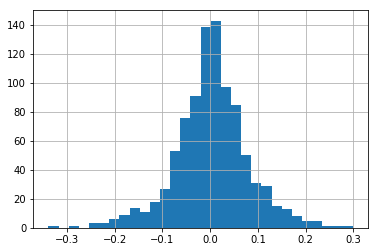

In [16]:
(data['home_proportion']- data['away_proportion']).hist(bins = 30)

Видно, что скорее всего гипотеза о равенстве долей будет верна, проверим это. 

### Проверим гипотезу о равенстве долей успешных бросков в домашних и гостевых играх с помощью Z-критрия для разности долей

In [32]:
p_values = []
for i in range(data.shape[0]):    
    p_values.append(proportions_ztest([data['score_home'].iloc[i], data['score_away'].iloc[i]],
                                      [data['atm_home'].iloc[i], data['atm_away'].iloc[i]],
                                      alternative="two-sided")[1])

In [42]:
p_values =  np.array(p_values)
print("Number of players who cares about location is ", (p_values < 0.05).sum())

Number of players who cares about location is  65


Но это без коррекции на множественную проверку гипотез

#### Коррекция Холм

In [44]:
multipletests(p_values, method='holm')[0].sum()

0

Теперь гипотеза о равенстве долей не отвергается вообще

####  Коррекция Бенджамини-Хохберга  

In [45]:
multipletests(p_values, method='fdr_bh')[0].sum()

0

####  Коррекция Бенджамини-Иекутиели

In [50]:
multipletests(p_values, method='fdr_by')[0].sum()

0

Вывод: Нет разницы в успехе бросков у игроков в домашних и гостевых играх